In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pmdarima import auto_arima
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv('meezan Bank.csv')

In [3]:
df

,Date,series-0- price,high,low,open,close
0,Thu Jun 18 2015,25.76,25.92,25.60,25.61,25.76
1,Fri Jun 19 2015,25.60,25.76,25.60,25.76,25.12
2,Mon Jun 22 2015,25.45,25.60,25.34,25.12,25.28
3,Tue Jun 23 2015,25.20,25.53,24.96,25.28,25.53
4,Wed Jun 24 2015,25.06,25.53,24.96,25.53,25.08
...,...,...,...,...,...,...
1569,Thu Nov 25 2021,148.00,148.95,146.50,147.00,147.75
1570,Fri Nov 26 2021,148.55,149.00,147.00,147.75,148.01
1571,Mon Nov 29 2021,150.50,158.90,147.10,148.01,151.00
1572,Tue Nov 30 2021,149.00,151.00,148.00,151.00,148.50


In [4]:
df.isnull()
# df.dropna()

,Date,series-0- price,high,low,open,close
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1569,False,False,False,False,False,False
1570,False,False,False,False,False,False
1571,False,False,False,False,False,False
1572,False,False,False,False,False,False


In [5]:
df = df.drop('series-0- price', 1)
df

,Date,high,low,open,close
0,Thu Jun 18 2015,25.92,25.60,25.61,25.76
1,Fri Jun 19 2015,25.76,25.60,25.76,25.12
2,Mon Jun 22 2015,25.60,25.34,25.12,25.28
3,Tue Jun 23 2015,25.53,24.96,25.28,25.53
4,Wed Jun 24 2015,25.53,24.96,25.53,25.08
...,...,...,...,...,...
1569,Thu Nov 25 2021,148.95,146.50,147.00,147.75
1570,Fri Nov 26 2021,149.00,147.00,147.75,148.01
1571,Mon Nov 29 2021,158.90,147.10,148.01,151.00
1572,Tue Nov 30 2021,151.00,148.00,151.00,148.50


In [6]:
minx=df['close'].min()
maxx=df['close'].max()
print("minimum in close price is ",minx)
print("maximum in close price is ",maxx)

minimum in close price is  25.08
maximum in close price is  155.0


In [7]:
print("Dataset is ",df.shape)
df.head()

Dataset is  (1574, 5)


,Date,high,low,open,close
0,Thu Jun 18 2015,25.92,25.60,25.61,25.76
1,Fri Jun 19 2015,25.76,25.60,25.76,25.12
2,Mon Jun 22 2015,25.60,25.34,25.12,25.28
3,Tue Jun 23 2015,25.53,24.96,25.28,25.53
4,Wed Jun 24 2015,25.53,24.96,25.53,25.08


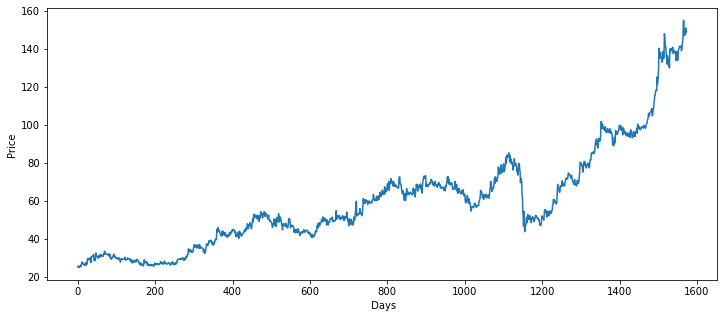

In [8]:
df['close'].plot(figsize=(12,5))
plt.xlabel(" Days")
plt.ylabel("Price")
plt.show()

In [9]:
# df['close'] = df['close'] - df['close'].shift(1)
# df['close'] = df['close'].diff()
# df = df.dropna()
# print(df)                                                differencing
df.dtypes


Date      object
high     float64
low      float64
open     float64
close    float64
dtype: object

In [10]:
def ad_test(df):
    dftest=adfuller(df,autolag='AIC')
    print("ADF :",dftest[0])
    print("P-VALUE :",dftest[1])
    print("no of lags :",dftest[2])
    
    print(" no of obs used for adf regression and critical value calculation",dftest[3])
    print("critical value")
    for key,val in dftest[4].items():
        print("\t",key ,":",val)

In [11]:
ad_test(df['close'])

ADF : 1.658324196159502
P-VALUE : 0.9980224198876636
no of lags : 3
 no of obs used for adf regression and critical value calculation 1570
critical value
	 1% : -3.4345219897741357
	 5% : -2.8633826834772953
	 10% : -2.5677510122114486


<Figure size 432x288 with 0 Axes>

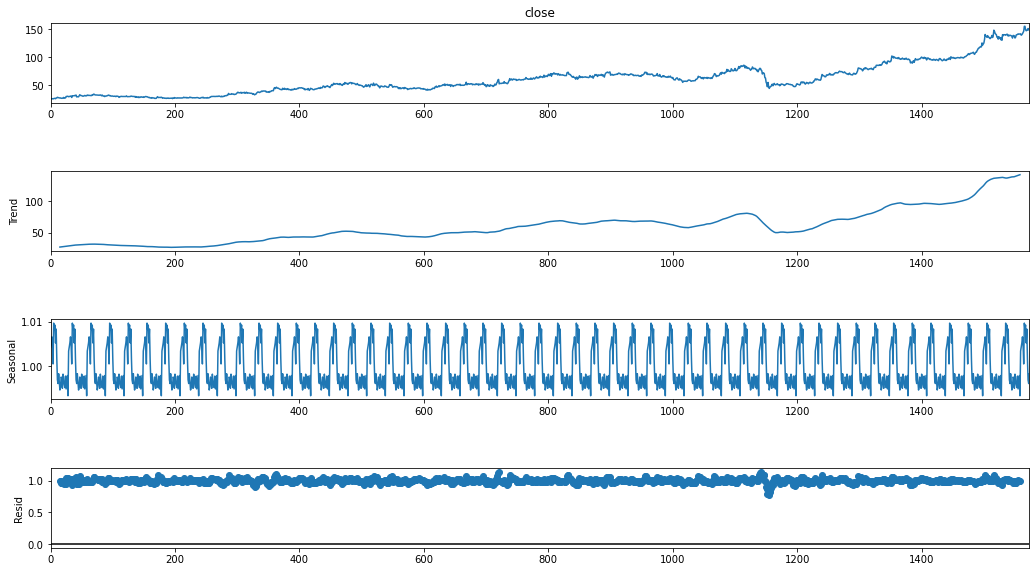

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df.close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

In [13]:
stepwise_fit=auto_arima(df.close,trace=True,supress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5820.095, Time=2.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5866.033, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5820.832, Time=0.30 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5819.145, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5867.998, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5821.045, Time=0.69 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5821.073, Time=0.41 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5822.882, Time=2.14 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=5823.182, Time=0.15 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 6.277 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1574
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -2906.572
Date:                Wed, 23 Feb 2022   AIC                           5819.145
Time:                        14:42:15   BIC                           5835.227
Sample:                             0   HQIC                          5825.122
                               - 1574                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0784      0.033      2.412      0.016       0.015       0.142
ma.L1         -0.1789      0.015    -11.903      0.000      -0.208      -0.149
sigma2         2.3577      0.042     56.087      0.000       2.275       2.440
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3088.48
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               4.96   Skew:                             0.60
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(1574, 5)
(1544, 5) (30, 5)


In [15]:
model=ARIMA(train['close'],order=(0,1,2))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                 1543
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -2816.571
Method:                       css-mle   S.D. of innovations              1.501
Date:                Wed, 23 Feb 2022   AIC                           5641.142
Time:                        14:42:15   BIC                           5662.508
Sample:                             1   HQIC                          5649.091
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0732      0.031      2.336      0.019       0.012       0.135
ma.L1.D.close    -0.1919      0.025     -7.556      0.000      -0.242      -0.142
ma.L2.D.close     0.0115      0.025      0.468      0.640      -0.037       0.060
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            8.3432           -4.1644j            9.3247           -0.0737
MA.2            8.3432           +4.1644j            9.3247            0.0737
-----------------------------------------------------------------------------
"""

In [16]:
df.Date=pd.to_datetime(df.Date)
df

,Date,high,low,open,close
0,2015-06-18,25.92,25.60,25.61,25.76
1,2015-06-19,25.76,25.60,25.76,25.12
2,2015-06-22,25.60,25.34,25.12,25.28
3,2015-06-23,25.53,24.96,25.28,25.53
4,2015-06-24,25.53,24.96,25.53,25.08
...,...,...,...,...,...
1569,2021-11-25,148.95,146.50,147.00,147.75
1570,2021-11-26,149.00,147.00,147.75,148.01
1571,2021-11-29,158.90,147.10,148.01,151.00
1572,2021-11-30,151.00,148.00,151.00,148.50


In [17]:

start=len(train)
end=len(train)+len(test)-1



In [18]:
start

1544

In [19]:
pred=model.predict(start=start,end=end,typ='levels')
# pred.index=df.index[start:end+1]
print(pred,)

1544    138.664574
1545    138.732762
1546    138.805965
1547    138.879168
1548    138.952372
1549    139.025575
1550    139.098778
1551    139.171981
1552    139.245185
1553    139.318388
1554    139.391591
1555    139.464795
1556    139.537998
1557    139.611201
1558    139.684404
1559    139.757608
1560    139.830811
1561    139.904014
1562    139.977218
1563    140.050421
1564    140.123624
1565    140.196827
1566    140.270031
1567    140.343234
1568    140.416437
1569    140.489641
1570    140.562844
1571    140.636047
1572    140.709251
1573    140.782454
dtype: float64


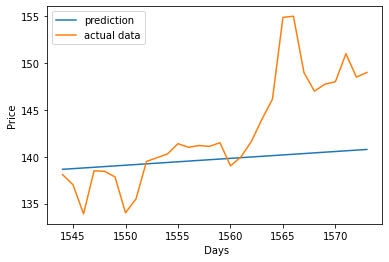

In [20]:
pred.plot(legend=True,label="prediction")
test.close.plot(legend=True,label="actual data")
plt.xlabel(" Days")
plt.ylabel("Price")
plt.show()

In [21]:
test.shape

(30, 5)

In [22]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test.close))
print("Root mean square error is :",rmse)

Root mean square error is : 5.868462274475539


In [23]:
model2=ARIMA(df.close,order=(0,1,1))
model2=model2.fit()
df.tail()

,Date,high,low,open,close
1569,2021-11-25,148.95,146.5,147.00,147.75
1570,2021-11-26,149.00,147.0,147.75,148.01
1571,2021-11-29,158.90,147.1,148.01,151.00
1572,2021-11-30,151.00,148.0,151.00,148.50
1573,2021-12-01,150.00,147.5,148.50,149.00


In [24]:
index_future_dates=pd.date_range(start='2021-12-01',end='2021-12-30')
pred=model2.predict(start=len(df),end=len(df)+30,typ='levels').rename("Arima prediction")
print(pred)

1574    149.068641
1575    149.147062
1576    149.225482
1577    149.303903
1578    149.382323
1579    149.460744
1580    149.539164
1581    149.617585
1582    149.696006
1583    149.774426
1584    149.852847
1585    149.931267
1586    150.009688
1587    150.088108
1588    150.166529
1589    150.244950
1590    150.323370
1591    150.401791
1592    150.480211
1593    150.558632
1594    150.637053
1595    150.715473
1596    150.793894
1597    150.872314
1598    150.950735
1599    151.029155
1600    151.107576
1601    151.185997
1602    151.264417
1603    151.342838
1604    151.421258
Name: Arima prediction, dtype: float64


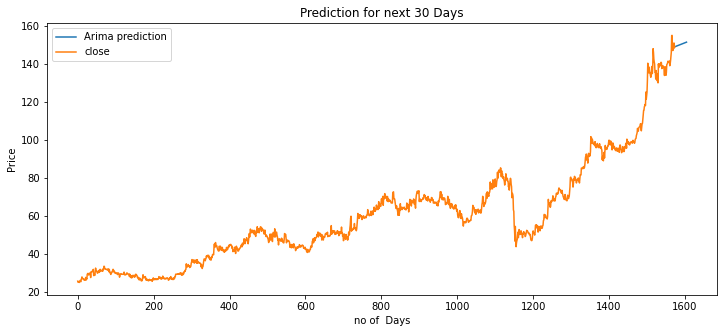

In [27]:
pred.plot(figsize=(12,5),legend=True)
df.close.plot(figsize=(12,5),legend=True)
plt.title("Prediction for next 30 Days")
plt.xlabel("no of  Days")
plt.ylabel("Price")
plt.show()

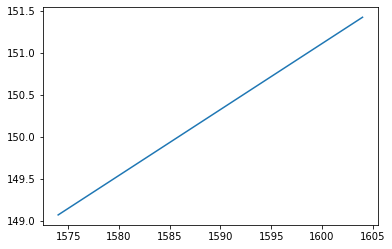